In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)

import os
import os.path as op
from os import listdir
from os.path import isfile, join

In [3]:
def filter_events(epochs, filter_for):

    if len(filter_for) >= len(epochs.event_id):
        return None
    
    else:
        temp_epochs = []
        for i in range(len(filter_for)):
            temp_epochs.append(epochs[epochs.events[:,-1] == filter_for[i]])
        
        return mne.concatenate_epochs(temp_epochs)

In [4]:
epochs=mne.read_epochs('C:\\Users\\new user\\EEG data\\data\\Ex10_Suj16_Run1-epo.fif',preload=True)

Reading C:\Users\new user\EEG data\data\Ex10_Suj16_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
288 matching events found
Created an SSP operator (subspace dimension = 1)
288 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [6]:
difference=abs(len(epochs[epochs.events[:,2]==4])-len(epochs[epochs.events[:,2]==5]))
if len(epochs.events[:,2])<=200 or difference >5 :
    difference=1
else:
    epochs = filter_events(epochs,[4,5])
print(epochs.event_id)
print(len(epochs[epochs.events[:,2]==4]))
print(len(epochs[epochs.events[:,2]==5]))
print(difference)

{u'new': 4, u'after': 20, u'scramble': 5, u'before': 10}
76
62
1


In [9]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [13]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        #StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [14]:
scores1 = []

path = 'C:\\Users\\new user\\EEG data\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    difference=abs(len(epochs[epochs.events[:,2]==4])-len(epochs[epochs.events[:,2]==5]))
    if len(epochs.events[:,2])<=200 or difference >5 :
        epochs=None
    else:
        epochs = filter_events(epochs,[4,5])
        X,y = get_samples_targets(epochs)
        scores1.append([f, classify_test_KNN(X,y)])

Reading C:\Users\new user\EEG data\run1\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
149 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj11_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
176 matching events found
Created an SSP operator (subspace dimension = 1)
176 matching events found
Created an SSP operator (subspace dimensio

183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run1\Ex10_Suj25_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
144 matching events found
Created an SSP operator (subspace dimension = 1)
144 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run1\Ex10_Suj26_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
27 matching events found
Created an SSP operator (subspace d

[['Ex10_Suj10_Run1-epo.fif' '0.533333333333']
 ['Ex10_Suj13_Run1-epo.fif' '0.45652173913']
 ['Ex10_Suj15_Run1-epo.fif' '0.555555555556']
 ['Ex10_Suj17_Run1-epo.fif' '0.659090909091']
 ['Ex10_Suj18_Run1-epo.fif' '0.533333333333']
 ['Ex10_Suj1_Run1-epo.fif' '0.511627906977']
 ['Ex10_Suj20_Run1-epo.fif' '0.652173913043']
 ['Ex10_Suj22_Run1-epo.fif' '0.558139534884']
 ['Ex10_Suj23_Run1-epo.fif' '0.666666666667']
 ['Ex10_Suj27_Run1-epo.fif' '0.673913043478']
 ['Ex10_Suj3_Run1-epo.fif' '0.4']
 ['Ex10_Suj5_Run1-epo.fif' '0.688888888889']
 ['Ex10_Suj7_Run1-epo.fif' '0.53488372093']
 ['Ex10_Suj8_Run1-epo.fif' '0.511111111111']
 ['Ex10_Suj9_Run1-epo.fif' '0.609756097561']]


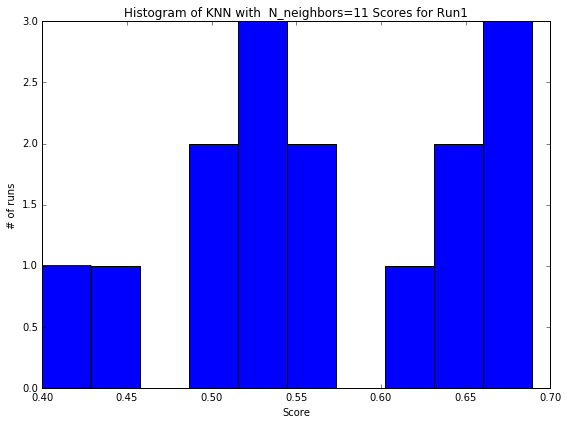

In [61]:
scores1=np.array(scores1)
print(scores1)
values1 = [float(x) for x in scores1[:,-1]]
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(values1, bins = 10);
ax.set_title('Histogram of KNN with  N_neighbors=11 Scores for Run1')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()

In [80]:
print("mean: ",np.mean(values1))
print("max: ",np.std(values1))
print("min: ",np.min(values1))

('mean: ', 0.56966638359886668)
('max: ', 0.08305396861242019)
('min: ', 0.40000000000000002)


In [16]:
def classify_test_LOG(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                         LogisticRegression())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [75]:
scores2 = []

path = 'C:\\Users\\new user\\EEG data\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    difference=abs(len(epochs[epochs.events[:,2]==4])-len(epochs[epochs.events[:,2]==5]))
    if len(epochs.events[:,2])<=200 or difference >=5:
        epochs=None
    else:
        epochs = filter_events(epochs,[4,5])
        X,y = get_samples_targets(epochs)
        scores2.append([f, classify_test_LOG(X,y)])

Reading C:\Users\new user\EEG data\run1\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
149 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj11_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
176 matching events found
Created an SSP operator (subspace dimension = 1)
176 matching events found
Created an SSP operator (subspace dimensio

183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run1\Ex10_Suj25_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
144 matching events found
Created an SSP operator (subspace dimension = 1)
144 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run1\Ex10_Suj26_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
27 matching events found
Created an SSP operator (subspace d

[['Ex10_Suj10_Run1-epo.fif' '0.666666666667']
 ['Ex10_Suj13_Run1-epo.fif' '0.608695652174']
 ['Ex10_Suj15_Run1-epo.fif' '0.688888888889']
 ['Ex10_Suj17_Run1-epo.fif' '0.727272727273']
 ['Ex10_Suj18_Run1-epo.fif' '0.777777777778']
 ['Ex10_Suj1_Run1-epo.fif' '0.697674418605']
 ['Ex10_Suj20_Run1-epo.fif' '0.695652173913']
 ['Ex10_Suj22_Run1-epo.fif' '0.697674418605']
 ['Ex10_Suj23_Run1-epo.fif' '0.777777777778']
 ['Ex10_Suj27_Run1-epo.fif' '0.673913043478']
 ['Ex10_Suj3_Run1-epo.fif' '0.488888888889']
 ['Ex10_Suj5_Run1-epo.fif' '0.711111111111']
 ['Ex10_Suj7_Run1-epo.fif' '0.813953488372']
 ['Ex10_Suj8_Run1-epo.fif' '0.666666666667']
 ['Ex10_Suj9_Run1-epo.fif' '0.682926829268']]


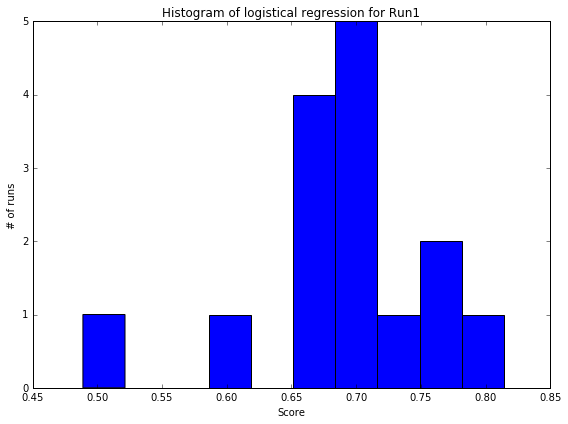

In [76]:
scores2=np.array(scores2)
print(scores2)
values2 = [float(x) for x in scores2[:,-1]]
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(values2, bins = 10);
ax.set_title('Histogram of logistical regression for Run1')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()

In [79]:
print("mean: ",np.mean(values2))
print("STD: ",np.std(values2))
print("min: ",np.min(values2))

('mean: ', 0.69170270196446659)
('STD: ', 0.073562015086816313)
('min: ', 0.48888888888900001)


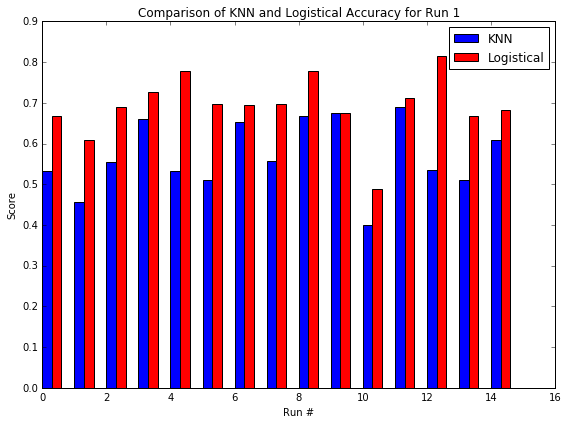

In [29]:
index=np.arange(15)
w=0.3
fig, ax = plt.subplots(figsize = (8,6))
rects1=ax.bar(index,scores1[:,1],w)
rects2=ax.bar(index+w,scores2[:,1],w,color="red")
ax.set_title('Comparison of KNN and Logistical Accuracy for Run 1')
ax.set_xlabel('Run #')
ax.set_ylabel('Score')
ax.legend( (rects1[0], rects2[0]), ('KNN', 'Logistical') )
fig.tight_layout()

In [41]:
scores3 = []

path2 = 'C:\\Users\\new user\\EEG data\\run2'
subject_runs = [f for f in listdir(path2) if isfile(join(path2, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path2, f),
                          preload=True);
    difference=abs(len(epochs[epochs.events[:,2]==4])-len(epochs[epochs.events[:,2]==5]))
    if len(epochs.events[:,2])<=200 or difference >5 :
        epochs=None
    else:
        epochs = filter_events(epochs,[4,5])
        X,y = get_samples_targets(epochs)
        scores3.append([f, classify_test_KNN(X,y)])

Reading C:\Users\new user\EEG data\run2\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj11_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
157 matching events found
Created an SSP operator (subspace dimension = 1)
157 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj12_Run2-epo.

154 matching events found
Created an SSP operator (subspace dimension = 1)
154 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj26_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
4 matching events found
Created an SSP operator (subspace dimension = 1)
4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj27_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dime

[['Ex10_Suj12_Run2-epo.fif' '0.4']
 ['Ex10_Suj13_Run2-epo.fif' '0.488888888889']
 ['Ex10_Suj14_Run2-epo.fif' '0.555555555556']
 ['Ex10_Suj15_Run2-epo.fif' '0.511111111111']
 ['Ex10_Suj16_Run2-epo.fif' '0.755555555556']
 ['Ex10_Suj17_Run2-epo.fif' '0.461538461538']
 ['Ex10_Suj18_Run2-epo.fif' '0.644444444444']
 ['Ex10_Suj21_Run2-epo.fif' '0.533333333333']
 ['Ex10_Suj23_Run2-epo.fif' '0.739130434783']
 ['Ex10_Suj27_Run2-epo.fif' '0.739130434783']
 ['Ex10_Suj5_Run2-epo.fif' '0.52380952381']
 ['Ex10_Suj9_Run2-epo.fif' '0.533333333333']]


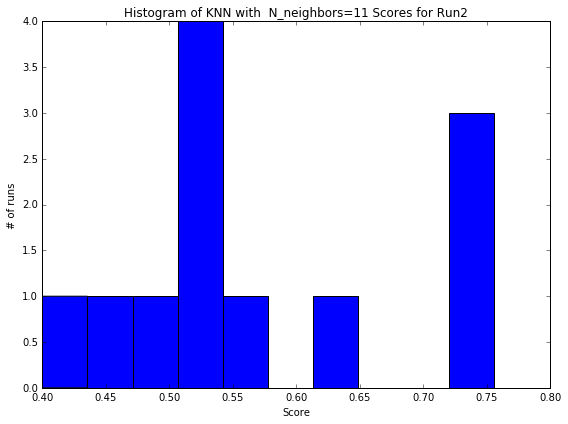

In [65]:
scores3=np.array(scores3)
print(scores3)
values3 = [float(x) for x in scores3[:,-1]]
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(values3, bins = 10);
ax.set_title('Histogram of KNN with  N_neighbors=11 Scores for Run2')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()

In [66]:
print("mean: ",np.mean(values3))
print("max: ",np.max(values3))
print("min: ",np.min(values3))

('mean: ', 0.57381925642800002)
('max: ', 0.75555555555599996)
('min: ', 0.40000000000000002)


In [43]:
scores4 = []

path2 = 'C:\\Users\\new user\\EEG data\\run2'
subject_runs = [f for f in listdir(path2) if isfile(join(path2, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path2, f),
                          preload=True);
    difference=abs(len(epochs[epochs.events[:,2]==4])-len(epochs[epochs.events[:,2]==5]))
    if len(epochs.events[:,2])<=200 or difference >5 :
        epochs=None
    else:
        epochs = filter_events(epochs,[4,5])
        X,y = get_samples_targets(epochs)
        scores4.append([f, classify_test_LOG(X,y)])

Reading C:\Users\new user\EEG data\run2\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj11_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
157 matching events found
Created an SSP operator (subspace dimension = 1)
157 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj12_Run2-epo.

154 matching events found
Created an SSP operator (subspace dimension = 1)
154 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj26_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
4 matching events found
Created an SSP operator (subspace dimension = 1)
4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\new user\EEG data\run2\Ex10_Suj27_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dime

[['Ex10_Suj12_Run2-epo.fif' '0.355555555556']
 ['Ex10_Suj13_Run2-epo.fif' '0.644444444444']
 ['Ex10_Suj14_Run2-epo.fif' '0.555555555556']
 ['Ex10_Suj15_Run2-epo.fif' '0.711111111111']
 ['Ex10_Suj16_Run2-epo.fif' '0.755555555556']
 ['Ex10_Suj17_Run2-epo.fif' '0.74358974359']
 ['Ex10_Suj18_Run2-epo.fif' '0.844444444444']
 ['Ex10_Suj21_Run2-epo.fif' '0.8']
 ['Ex10_Suj23_Run2-epo.fif' '0.826086956522']
 ['Ex10_Suj27_Run2-epo.fif' '0.695652173913']
 ['Ex10_Suj5_Run2-epo.fif' '0.738095238095']
 ['Ex10_Suj9_Run2-epo.fif' '0.533333333333']]


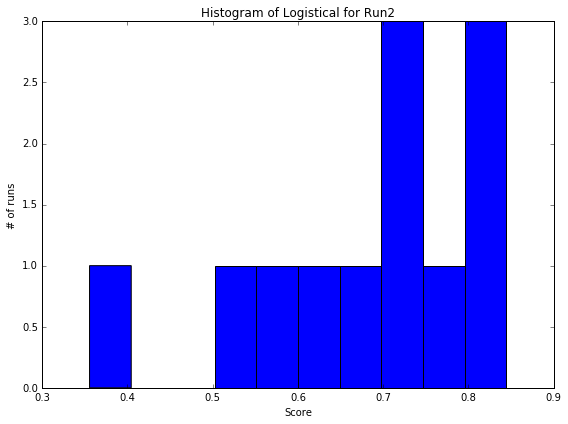

In [67]:
scores4=np.array(scores4)
print(scores4)
values4 = [float(x) for x in scores4[:,-1]]
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(values4, bins = 10);
ax.set_title('Histogram of Logistical for Run2')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()

In [68]:
print("mean: ",np.mean(values4))
print("max: ",np.max(values4))
print("min: ",np.min(values4))

('mean: ', 0.68361867601000004)
('max: ', 0.84444444444400002)
('min: ', 0.35555555555599999)


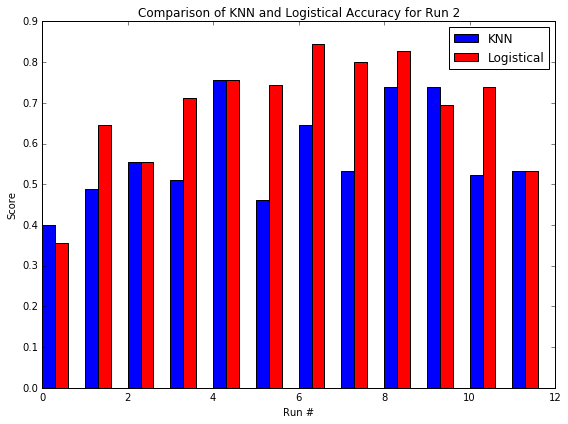

In [46]:
index=np.arange(12)
w=0.3
fig, ax = plt.subplots(figsize = (8,6))
rects1=ax.bar(index,scores3[:,1],w)
rects2=ax.bar(index+w,scores4[:,1],w,color="red")
ax.set_title('Comparison of KNN and Logistical Accuracy for Run 2')
ax.set_xlabel('Run #')
ax.set_ylabel('Score')
ax.legend( (rects1[0], rects2[0]), ('KNN', 'Logistical') )
fig.tight_layout()

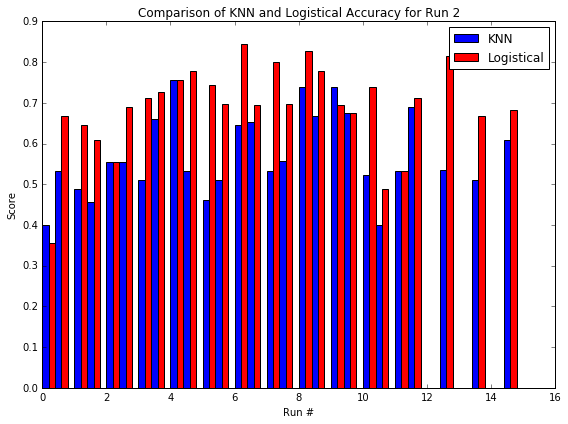

In [56]:
index=np.arange(12)
index1=np.arange(15)
w=0.2
fig, ax = plt.subplots(figsize = (8,6))
rects1=ax.bar(index,scores3[:,1],w)
rects2=ax.bar(index+w,scores4[:,1],w,color="red")
rects1=ax.bar(index1+2*w,scores1[:,1],w)
rects2=ax.bar(index1+3*w,scores2[:,1],w,color="red")
ax.set_title('Comparison of KNN and Logistical Accuracy for Run 2')
ax.set_xlabel('Run #')
ax.set_ylabel('Score')
ax.legend( (rects1[0], rects2[0]), ('KNN', 'Logistical') )
fig.tight_layout()

In [ ]:
scores = []
temp_epochs = []
path = 'C:\\Users\\new user\\EEG data\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True)
    #epochs = filter_events(epochs, [4,5])
    #temp_epochs.append(epochs[epochs.events[:,-1] == filter_for[i]])
    temp_epochs.append(epochs[epochs.events[:,-1] == 4])
    #epochs=[epochs]
    #X,y = get_samples_targets(epochs)
    #scores.append([f, classify_test(X,y)])
    epochs=mne.concatenate_epochs(temp_epochs)

Reading C:\Users\new user\EEG data\run1\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
75 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj11_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
176 matching events found
Created an SSP operator (subspace dimension = 1)
176 matching events found
Created an SSP operator (subspace dimension

D:\New folder\envs\py27\lib\site-packages\mne\epochs.py:2651: RuntimeWarning: overflow encountered in long_scalars
  int((10 + tmax) * epochs.info['sfreq']))


760 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj20_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
835 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj21_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
14 matching events found
Created an SSP operator (subspace dimension = 1)
14 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
836 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj22_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
284 matching events found
Created an SSP operator (subspace dimension = 1)
284 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
908 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj23_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
984 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj24_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1038 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj25_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
144 matching events found
Created an SSP operator (subspace dimension = 1)
144 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1083 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj26_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
27 matching events found
Created an SSP operator (subspace dimension = 1)
27 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1089 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj27_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1166 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj28_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
255 matching events found
Created an SSP operator (subspace dimension = 1)
255 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1241 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj2_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
185 matching events found
Created an SSP operator (subspace dimension = 1)
185 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1287 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj3_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1361 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj4_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1433 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj5_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
293 matching events found
Created an SSP operator (subspace dimension = 1)
293 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1508 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
The events passed to the Epochs constructor are not chronologically ordered.
1574 matching events found


<ipython-input-105-a7e0436d2b43>:14: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs=mne.concatenate_epochs(temp_epochs)


Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\run1\Ex10_Suj7_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [1]:
epochs=np.array(epochs)
epochs.shape


NameError: name 'np' is not defined